<a href="https://colab.research.google.com/github/Daeton1/project2_2100/blob/main/Copy_of_CIS2100project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random
import datetime

# Let's define our classes.

class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price


class Order:
    def __init__(self, order_id):
        self.order_id = order_id
        self.products = []

    def add_product(self, product):
        self.products.append(product)

    def get_total(self):
        return sum(p.price for p in self.products)


class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []

    def create_order(self, order_id):
        order = Order(order_id)
        self.orders.append(order)
        return order


class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = []

    def add_customer(self, customer):
        self.customers.append(customer)

    def get_all_orders(self):
        # Return all orders from all customers
        all_orders = []
        for c in self.customers:
            for o in c.orders:
                all_orders.append((c.customer_id, o))
        return all_orders


class Corporation:
    def __init__(self):
        self.stores = []

    def add_store(self, store):
        self.stores.append(store)

    def get_all_sales_data(self):
        # Return all sales data (store_id, customer_id, order_id, product, price)
        data = []
        for s in self.stores:
            orders = s.get_all_orders()
            for (cust_id, order) in orders:
                for product in order.products:
                    data.append({
                        "StoreID": s.store_id,
                        "CustomerID": cust_id,
                        "OrderID": order.order_id,
                        "ProductName": product.name,
                        "Price": product.price
                    })
        return data


# Now we will simulate some data.

# Let's define some products
available_products = [
    Product("Widget A", 19.99),
    Product("Widget B", 29.99),
    Product("Widget C", 9.99),
    Product("Gadget X", 99.99),
    Product("Gadget Y", 49.99),
    Product("Thingamajig", 5.00)
]

# Create a corporation
corp = Corporation()

# Create a few stores
for store_id in range(1, 4):  # 3 stores for example
    store = Store(store_id=store_id)

    # Add a few customers to each store
    for cust_id in range(1, 6):  # 5 customers per store
        customer = Customer(customer_id=f"S{store_id}C{cust_id}")

        # Each customer makes a random number of orders throughout the year
        # Let's say between 1 and 10 orders
        num_orders = random.randint(1, 10)

        for _ in range(num_orders):
            order_id = f"O{store_id}{cust_id}{random.randint(1000,9999)}"
            order = customer.create_order(order_id)

            # Each order has between 1 and 5 products
            num_products = random.randint(1, 5)
            for _ in range(num_products):
                product = random.choice(available_products)
                order.add_product(product)

        store.add_customer(customer)

    corp.add_store(store)


# Now we have a corporation with stores, customers, and orders.
# We want to write all sales data to a single CSV file.

# The CSV headers:
# Date Intro, time, StoreID, customerID, OrderID, Product name, Price of product

# We'll simulate a random date/time for each order line.
# Let's assume we have one year's worth of data from a specific year, say 2023.

def random_datetime_in_year(year=2023):
    # Generate a random datetime in the given year
    start = datetime.datetime(year, 1, 1)
    end = datetime.datetime(year, 12, 31, 23, 59, 59)
    delta = end - start
    random_second = random.randint(0, int(delta.total_seconds()))
    dt = start + datetime.timedelta(seconds=random_second)
    return dt


sales_data = corp.get_all_sales_data()

with open("corporate_sales_data.csv", mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Date Intro", "time", "StoreID", "customerID", "OrderID", "Product name", "Price of product"])

    for record in sales_data:
        dt = random_datetime_in_year()
        date_str = dt.date().isoformat()
        time_str = dt.time().isoformat(timespec='seconds')

        writer.writerow([
            date_str,
            time_str,
            record["StoreID"],
            record["CustomerID"],
            record["OrderID"],
            record["ProductName"],
            record["Price"]
        ])

print("Data generation complete. 'corporate_sales_data.csv' created.")


Data generation complete. 'corporate_sales_data.csv' created.


Most Popular Products in Customer Orders:
       Product  Frequency
0     Widget B         62
1     Widget A         59
2     Gadget X         59
3  Thingamajig         59
4     Gadget Y         57
Frequency of large orders (>3 items): 50
Large Orders by Store:
   StoreID  LargeOrderCount
0        1               14
1        2               11
2        3               25


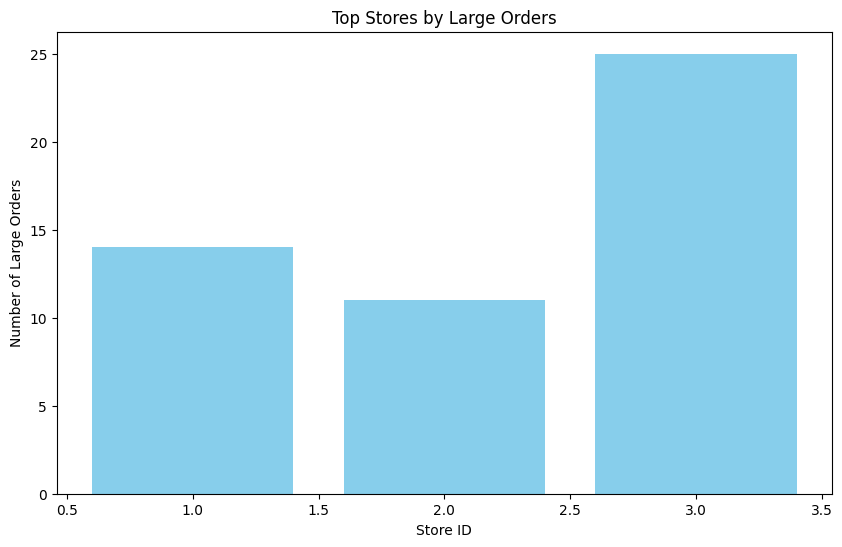

Top Products in Large Orders:
       Product  Frequency
0     Widget B         43
1     Gadget X         40
2     Widget A         38
3  Thingamajig         38
4     Gadget Y         36
Categorical Makeup of Products in Large Orders:
  Product name  Count  Percentage
0     Gadget X     40   17.777778
1     Gadget Y     36   16.000000
2  Thingamajig     38   16.888889
3     Widget A     38   16.888889
4     Widget B     43   19.111111
5     Widget C     30   13.333333


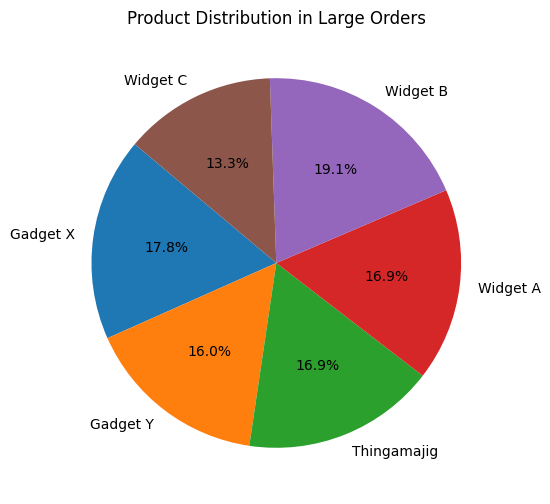

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the sales data
file_path = "corporate_sales_data.csv"  # Ensure this matches the file created earlier
df = pd.read_csv(file_path)

# Step 2: The most prevalent products in customer orders
most_popular_products = df['Product name'].value_counts().reset_index()
most_popular_products.columns = ['Product', 'Frequency']
print("Most Popular Products in Customer Orders:")
print(most_popular_products.head())

# Step 3: Frequency of large orders (defining "large order" as containing more than 3 items)
order_item_counts = df.groupby('OrderID').size().reset_index(name='ItemCount')
large_orders = order_item_counts[order_item_counts['ItemCount'] > 3]
large_order_count = len(large_orders)
print(f"Frequency of large orders (>3 items): {large_order_count}")

# Step 4: Which stores handled the most large orders and by how much
df_large_orders = df[df['OrderID'].isin(large_orders['OrderID'])]
large_orders_by_store = df_large_orders.groupby('StoreID')['OrderID'].nunique().reset_index()
large_orders_by_store.columns = ['StoreID', 'LargeOrderCount']
print("Large Orders by Store:")
print(large_orders_by_store)

# Step 5: Visualization for top stores with large orders
plt.figure(figsize=(10, 6))
plt.bar(large_orders_by_store['StoreID'], large_orders_by_store['LargeOrderCount'], color='skyblue')
plt.title("Top Stores by Large Orders")
plt.xlabel("Store ID")
plt.ylabel("Number of Large Orders")
plt.show()

# Step 6: Top-n products purchased in large orders
top_large_order_products = df_large_orders['Product name'].value_counts().reset_index()
top_large_order_products.columns = ['Product', 'Frequency']
print("Top Products in Large Orders:")
print(top_large_order_products.head(5))

# Step 7: Categorical makeup of products in large orders
category_distribution = df_large_orders.groupby('Product name').size().reset_index(name='Count')
category_distribution['Percentage'] = (category_distribution['Count'] / category_distribution['Count'].sum()) * 100
print("Categorical Makeup of Products in Large Orders:")
print(category_distribution)

# Step 8: Visualization for categorical makeup
plt.figure(figsize=(10, 6))
plt.pie(category_distribution['Count'], labels=category_distribution['Product name'], autopct='%1.1f%%', startangle=140)
plt.title("Product Distribution in Large Orders")
plt.show()
